In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import seaborn as sns

In [8]:
df=pd.read_csv('Classified Data',index_col=0)

In [10]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [11]:
#standerdise all fetures in knn because this only works on distance vector. that mean we need to minimize the distance at a standard scale like normalization

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [15]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
scaler.transform(df.drop('TARGET CLASS',axis=1))

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ..., 
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [17]:
scaled_fetures=scaler.transform(df.drop('TARGET CLASS',axis=1))

In [18]:
scaled_fetures

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ..., 
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [21]:
df_feature= pd.DataFrame(scaled_fetures,columns=df.columns[:-1]) #drop target class column

In [22]:
df_feature.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn=KNeighborsClassifier(n_neighbors=5)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X=df_feature
y=df['TARGET CLASS']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [35]:
pred=knn.predict(X_test)

In [36]:
pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0])

In [37]:
from sklearn.metrics import confusion_matrix,classification_report

In [38]:
print(confusion_matrix(y_test,pred),classification_report(y_test,pred))

[[154   5]
 [ 12 129]]              precision    recall  f1-score   support

          0       0.93      0.97      0.95       159
          1       0.96      0.91      0.94       141

avg / total       0.94      0.94      0.94       300



In [39]:
#lets calculate error rate with respect to k values

In [50]:
error = np.mean(y_test- pred)

In [51]:
error

0.023333333333333334

In [52]:
error =[]

In [53]:
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    error.append(np.mean(y_test- knn.predict(X_test)))

In [54]:
print(error)

[0.023333333333333334, 0.056666666666666664, 0.0033333333333333335, 0.043333333333333335, 0.023333333333333334, 0.03, 0.006666666666666667, 0.02666666666666667, 0.0033333333333333335, 0.023333333333333334, 0.006666666666666667, 0.02, 0.01, 0.016666666666666666, 0.0033333333333333335, 0.01, 0.01, 0.02, 0.01, 0.02666666666666667, 0.016666666666666666, 0.016666666666666666, 0.0033333333333333335, 0.016666666666666666, -0.0033333333333333335, 0.0033333333333333335, 0.0033333333333333335, 0.006666666666666667, -0.006666666666666667, 0.0033333333333333335, -0.0033333333333333335, 0.006666666666666667, -0.006666666666666667, 0.0033333333333333335, 0.0, 0.0033333333333333335, 0.0, 0.0033333333333333335, -0.0033333333333333335]


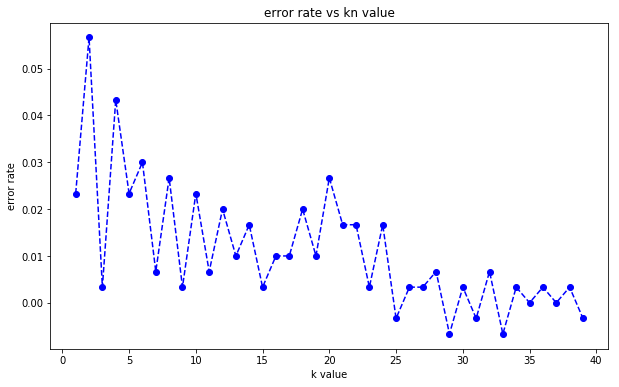

In [59]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error,color='blue',linestyle='dashed',marker='o')
plt.title('error rate vs kn value')
plt.xlabel('k value')
plt.ylabel('error rate')
plt.show()

In [60]:
#lets check error again for k value 29

In [63]:
knn=KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(confusion_matrix(y_test,pred),classification_report(y_test,pred))
    

[[149  10]
 [  8 133]]              precision    recall  f1-score   support

          0       0.95      0.94      0.94       159
          1       0.93      0.94      0.94       141

avg / total       0.94      0.94      0.94       300



In [72]:
knn=KNeighborsClassifier(n_neighbors=33)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(confusion_matrix(y_test,pred),classification_report(y_test,pred))

[[150   9]
 [  7 134]]              precision    recall  f1-score   support

          0       0.96      0.94      0.95       159
          1       0.94      0.95      0.94       141

avg / total       0.95      0.95      0.95       300



In [73]:
np.mean(y_test != pred)

0.053333333333333337

In [76]:
y_test != pred

545    False
298    False
109    False
837    False
194    False
605     True
246    False
693    False
802    False
406    False
824    False
977    False
742    False
341    False
601    False
319    False
121    False
299    False
32     False
269     True
887    False
668    False
820    False
754    False
731    False
225    False
569    False
56     False
408    False
734    False
       ...  
532    False
866    False
555    False
716    False
81      True
756    False
796    False
612    False
699    False
915     True
801     True
729    False
577    False
260    False
938    False
389    False
476    False
202    False
442    False
113    False
620    False
550    False
27     False
720    False
945    False
847    False
682    False
884    False
325    False
482    False
Name: TARGET CLASS, Length: 300, dtype: bool